In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")

#Notebook focado em engajam,ento e visualizacao

In [4]:
df = pd.read_csv("../data/brasileirao_2009_jogos_final.csv")
tabela = pd.read_csv("../data/ranking_final_consolidado_2009.csv")


Text(0, 0.5, 'Clubes')

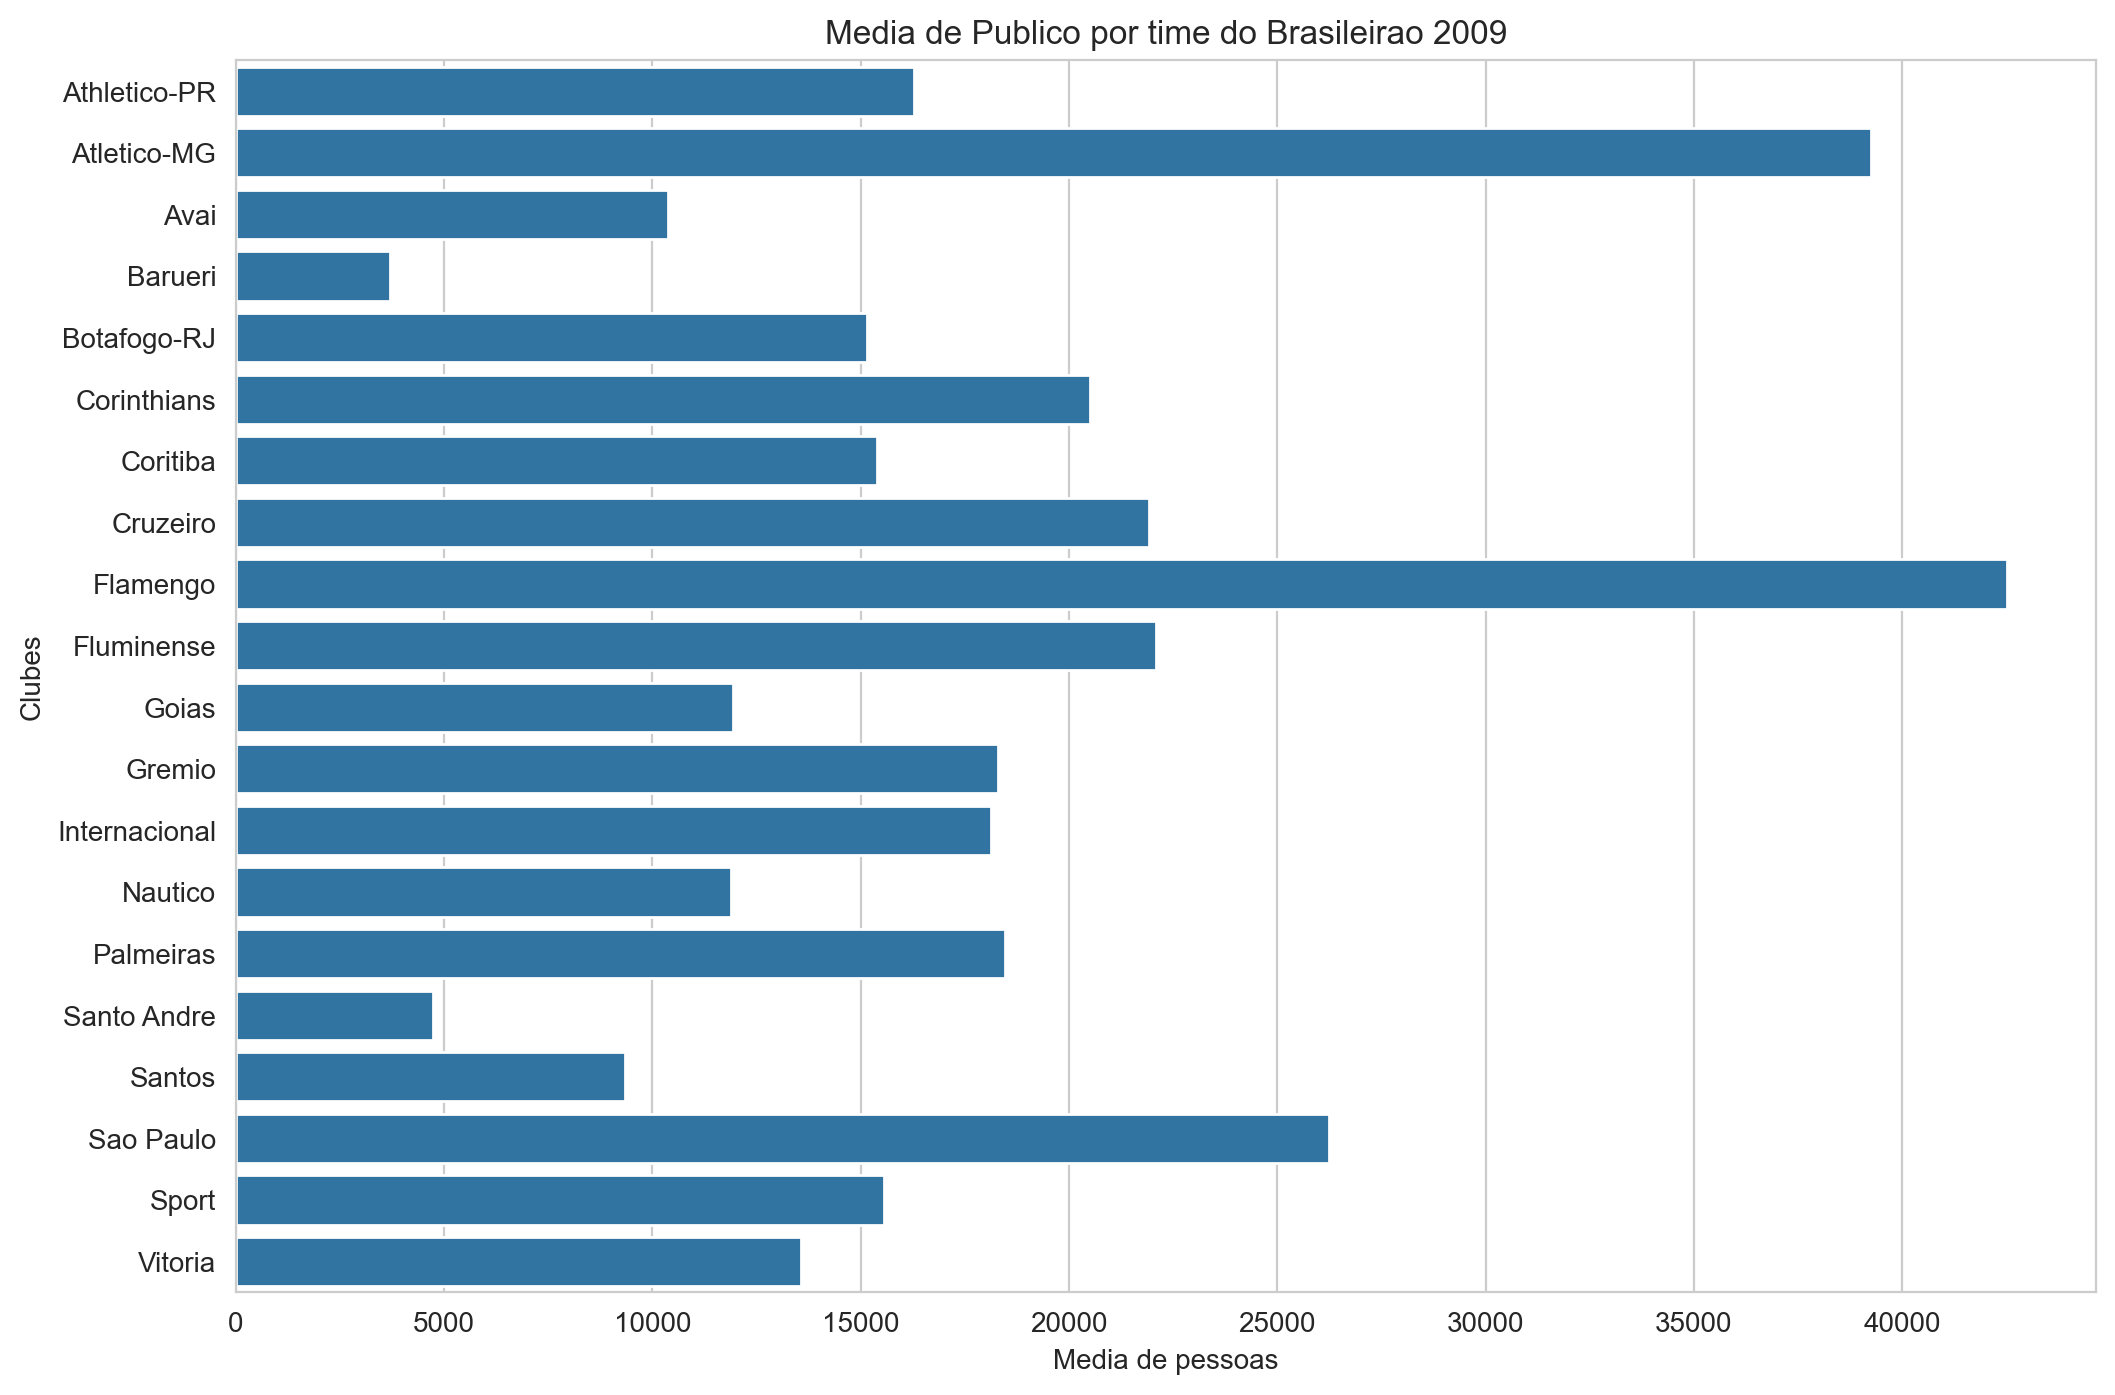

In [5]:
ranking_publico = df.groupby("mandante")["publico_jogo"].mean().reset_index()
ranking_publico["publico_jogo"] = ranking_publico["publico_jogo"].round(0)
plt.figure(figsize=(12,8))
sns.barplot(data=ranking_publico, x="publico_jogo", y="mandante")
plt.title("Media de Publico por time do Brasileirao 2009")
plt.xlabel("Media de pessoas")
plt.ylabel("Clubes")
# Media de publicos dos times do brasileirao 2009 da pra notar que os times que foram rebaixados realmente nao tiveram um grande publico para apoiar o clube desde o inicio

Text(0, 0.5, 'Publico do jogo')

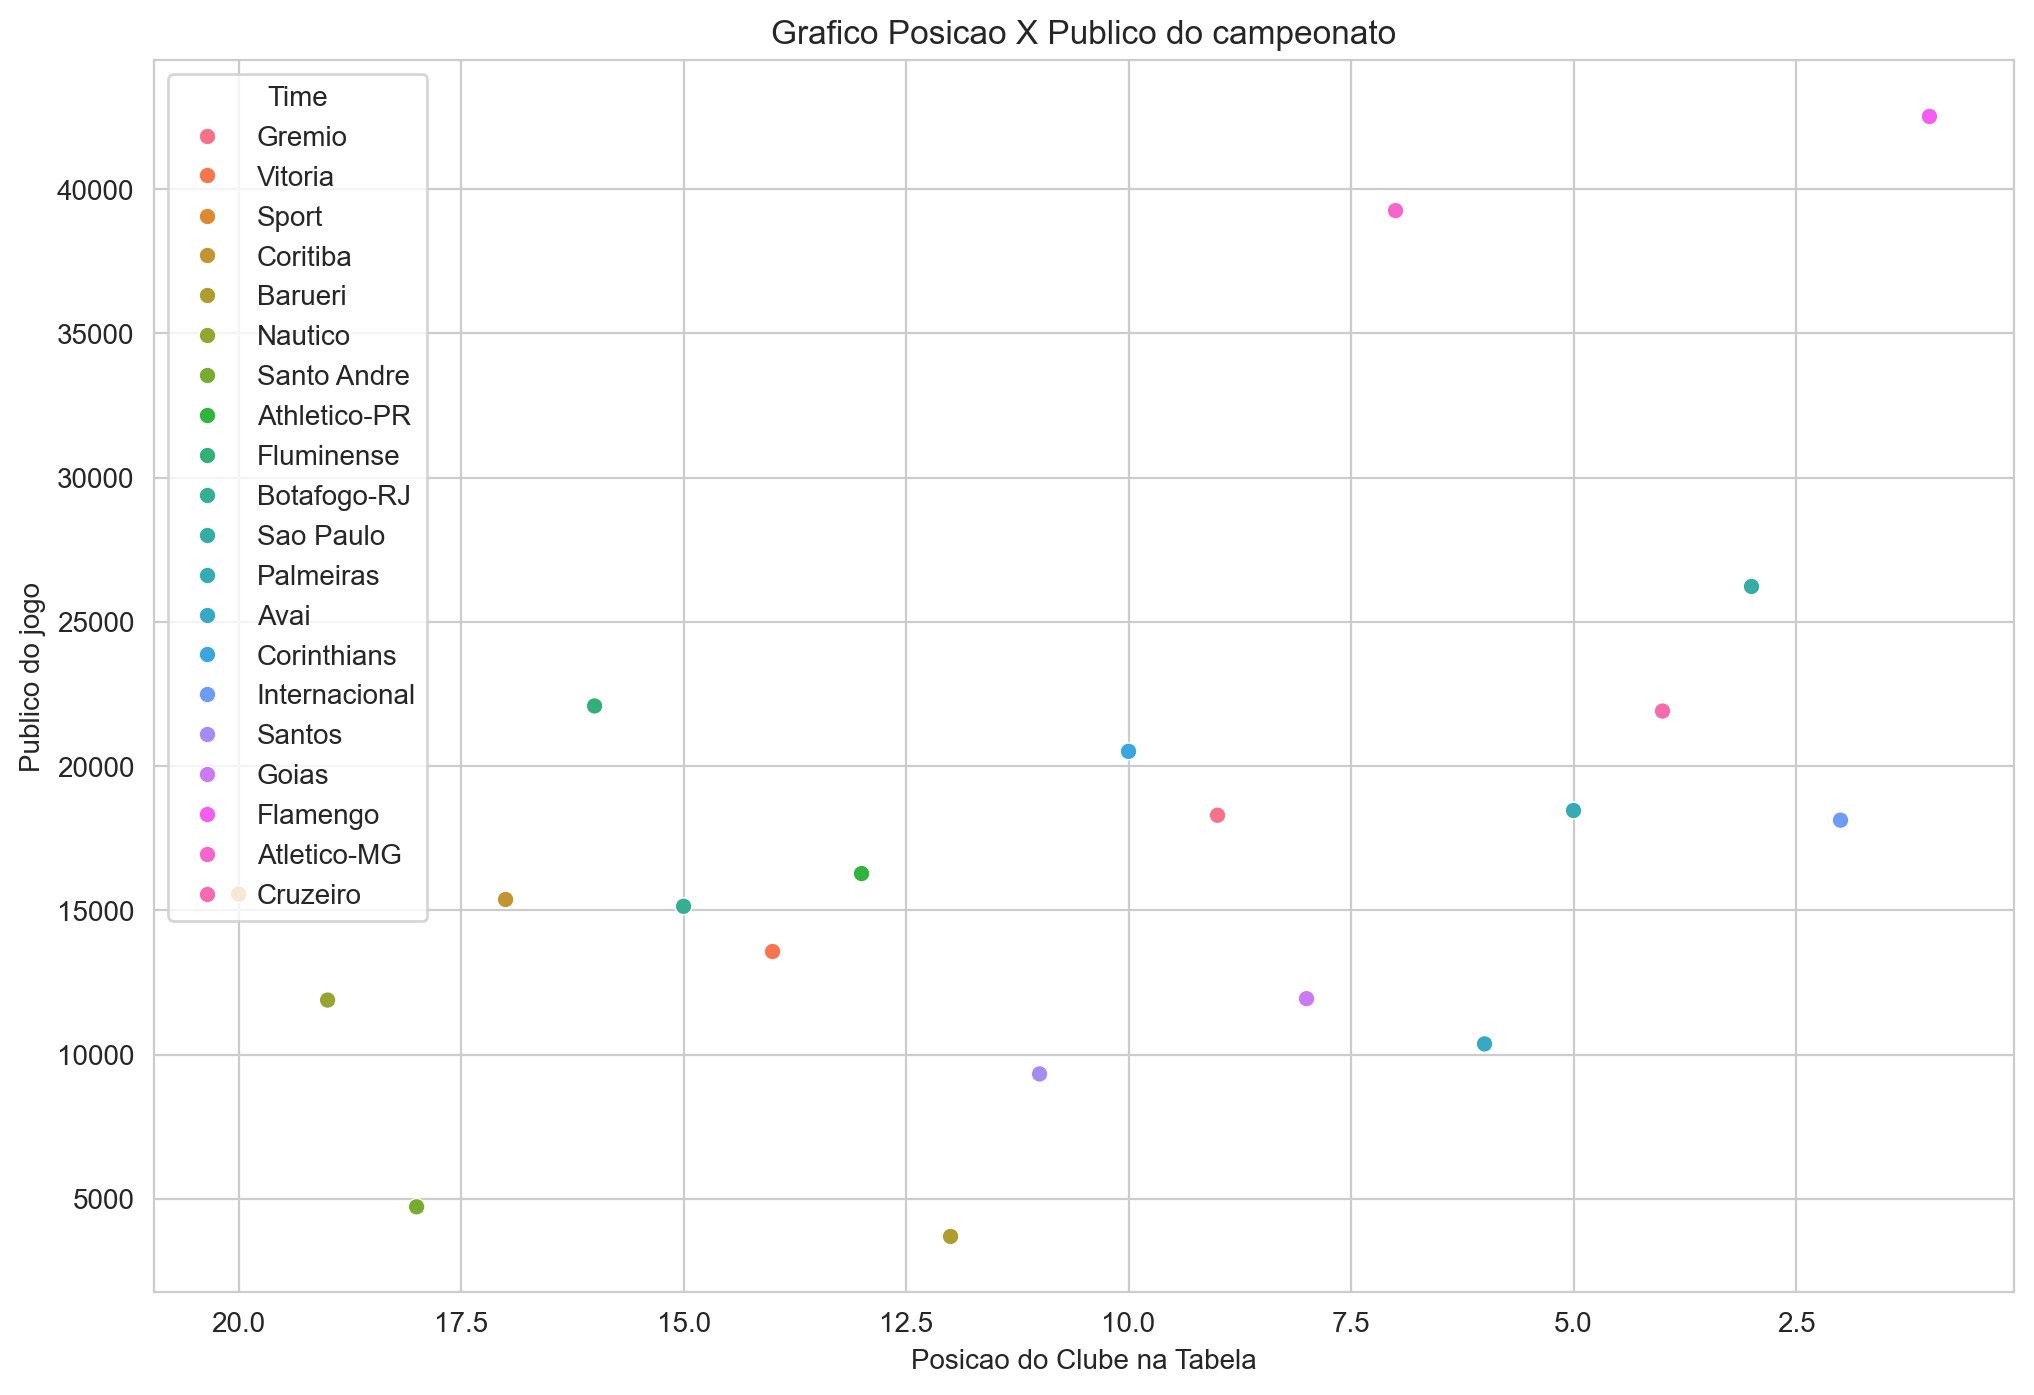

In [6]:
ranking_publico = ranking_publico.rename(columns={"mandante" : "Time"})
tabela_com_publico = pd.merge(tabela, ranking_publico, on="Time")
plt.figure(figsize=(12,8))
sns.scatterplot(data=tabela_com_publico, x="Posicao", y="publico_jogo", hue="Time")
plt.gca().invert_xaxis()
plt.title("Grafico Posicao X Publico do campeonato")
plt.xlabel("Posicao do Clube na Tabela")
plt.ylabel("Publico do jogo")
#Esse grafico complementa o primeiro que analisamos que realmente os times que foram rebaixados nao tiveram muita ajuda da torcida e os times que disputaram o G4 tiveram o 12 jogador participando


Text(0, 0.5, 'publico do jogo')

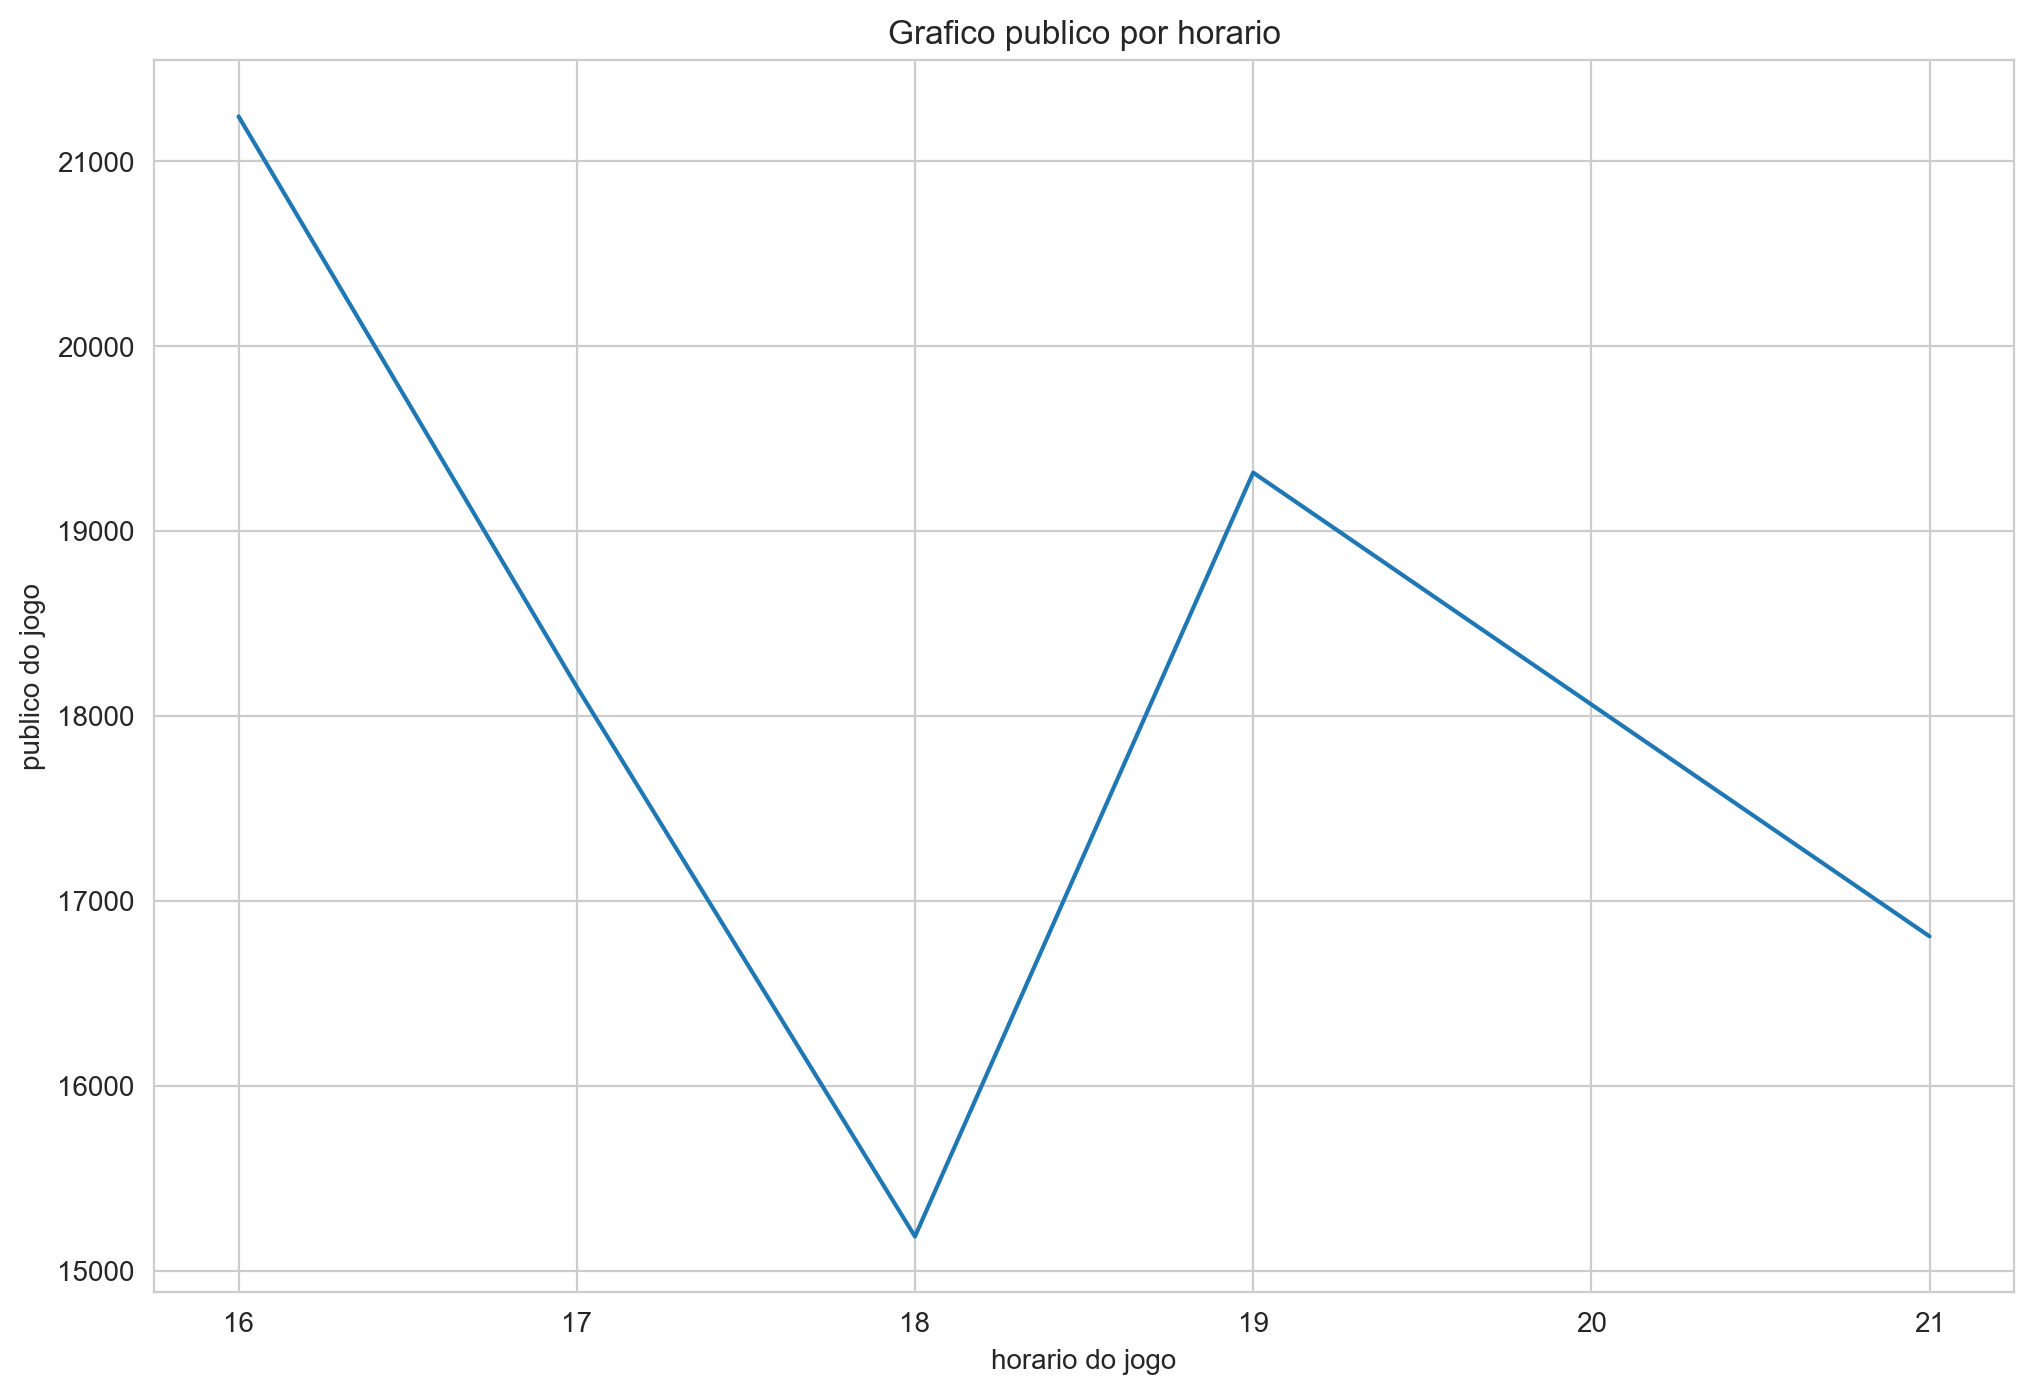

In [7]:
publico_por_horario = df.groupby("hora_limpa")["publico_jogo"].mean().reset_index()
publico_por_horario["publico_jogo"] = publico_por_horario["publico_jogo"].round(0)
plt.figure(figsize=(12,8))
sns.lineplot(data=publico_por_horario, x="hora_limpa", y="publico_jogo")
plt.title("Grafico publico por horario")
plt.xlabel("horario do jogo")
plt.ylabel("publico do jogo")
#Deste grafico tiramos insights importantes pq apesar de estar omitido o dia dos jogos sabemos que as 16h so acontece jogos dias de domingo, as 21/22 so acontece jogos quarta-feira e as 18h so acontece jogos aos sabados
#e aqui se ve pq a maioria dos classicos sao colocados aos domingos 16h.

Text(0, 0.5, 'Rodadas')

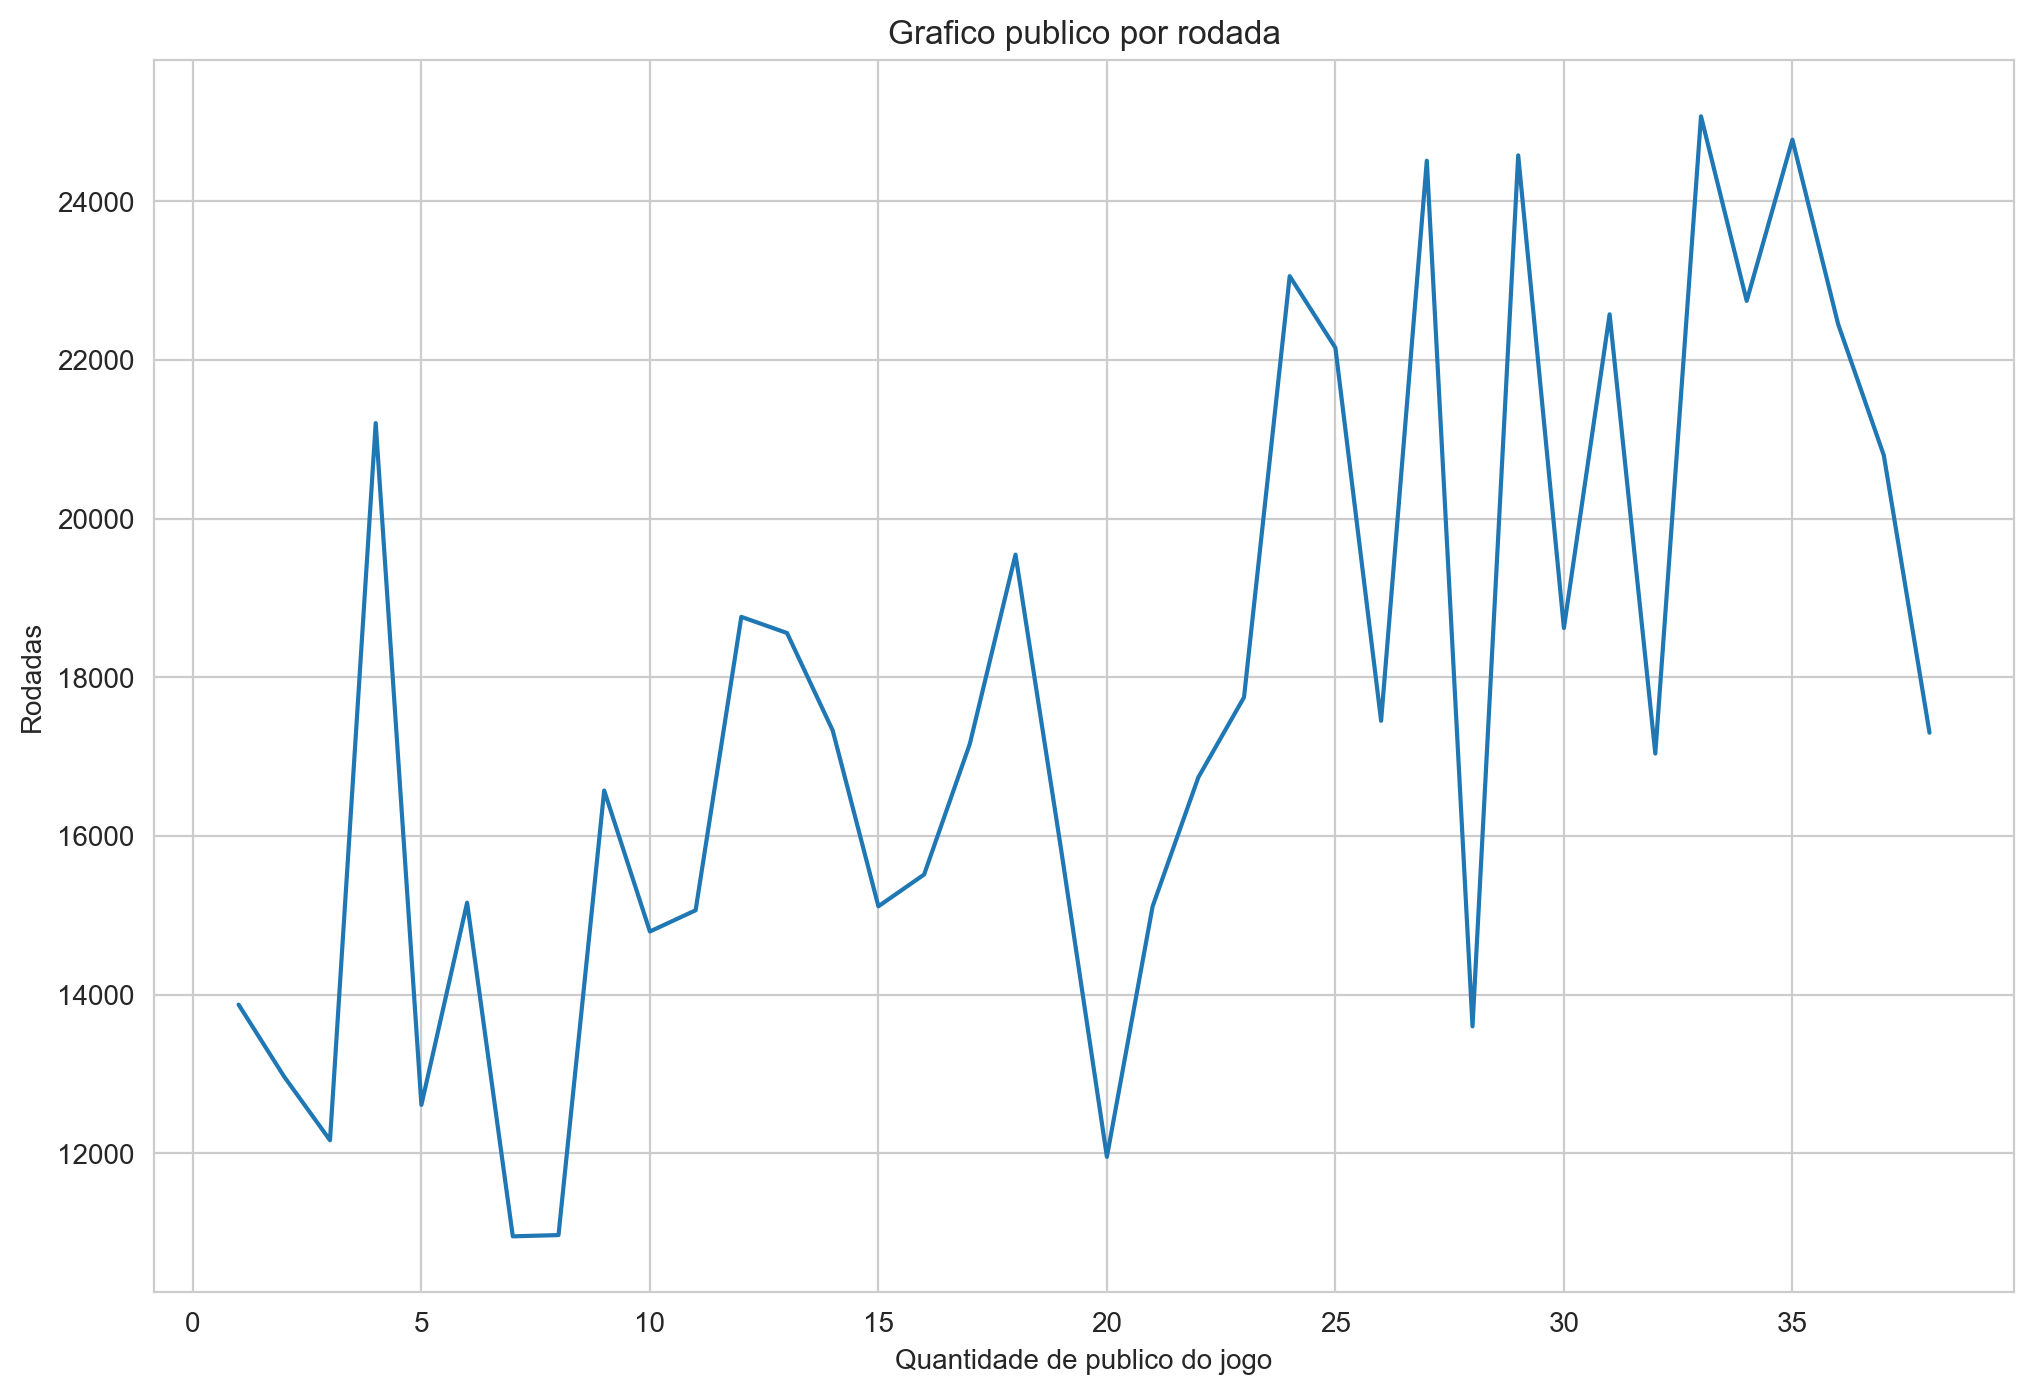

In [8]:
publico_por_rodada = df.groupby("rodada")["publico_jogo"].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=publico_por_rodada, x="rodada", y="publico_jogo")
plt.title("Grafico publico por rodada")
plt.xlabel("Quantidade de publico do jogo")
plt.ylabel("Rodadas")
#Aqui da pra notar que a partir da rodada 27/28 tivemos MUITAS rodadas com um publico alto que indica a competitividade do brasileirao 2009 na reta final

Text(0, 0.5, 'Quantidade de expulsos')

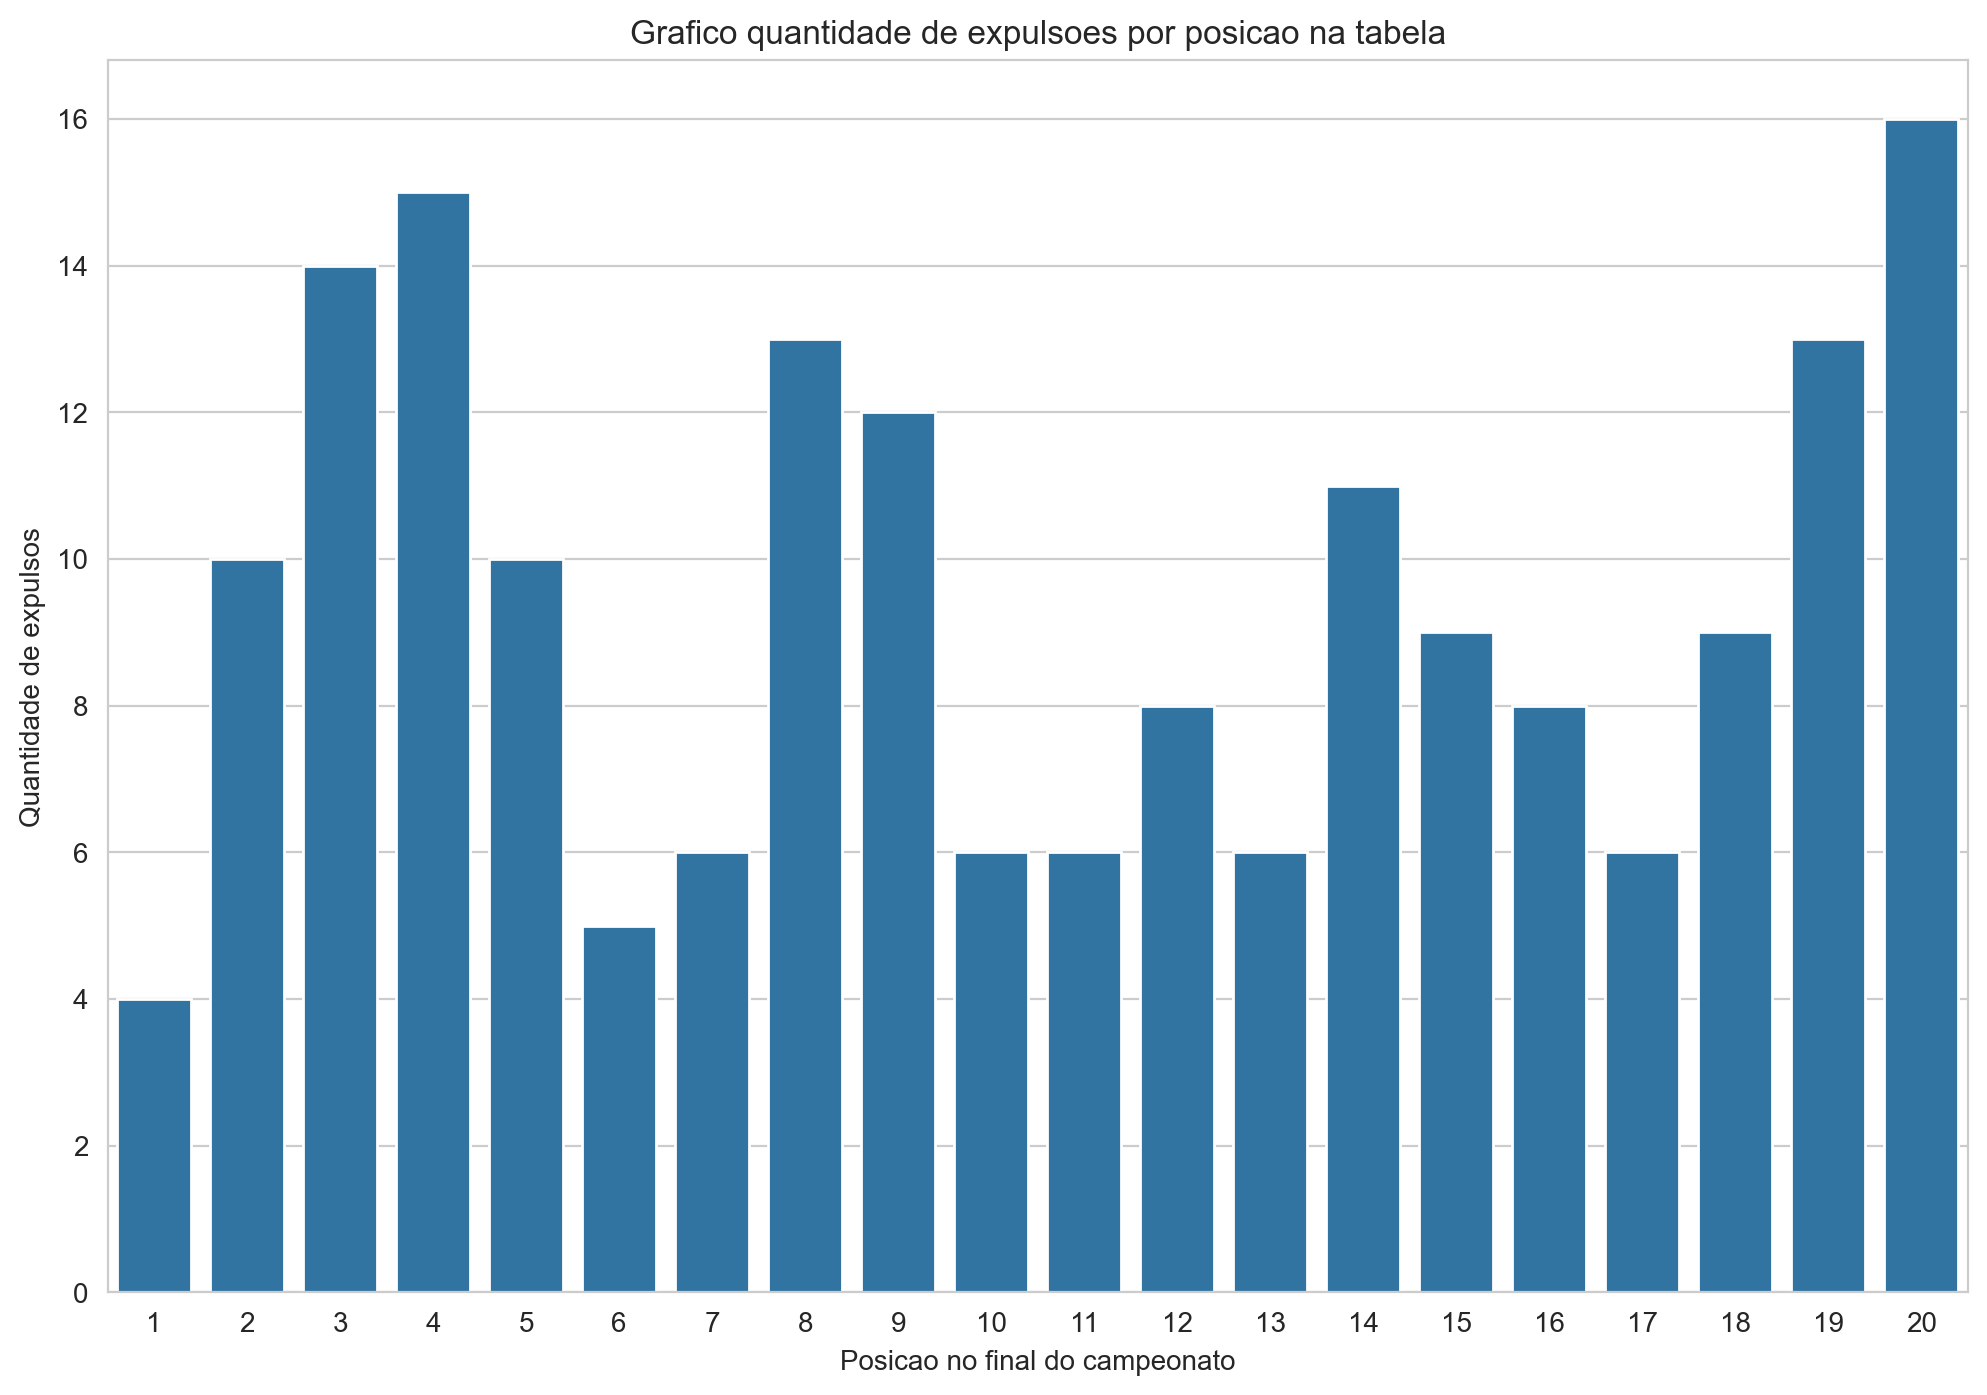

In [9]:
expulsos_por_posicao = tabela.groupby("Posicao")["Expulsos_Total"].sum().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data = expulsos_por_posicao, x="Posicao", y="Expulsos_Total")
plt.title("Grafico quantidade de expulsoes por posicao na tabela")
plt.xlabel("Posicao no final do campeonato")
plt.ylabel("Quantidade de expulsos")
#Outra coisa que influenciou os times que disputaram G4 e os que foram rebaixados.

Text(0, 0.5, 'Estadios')

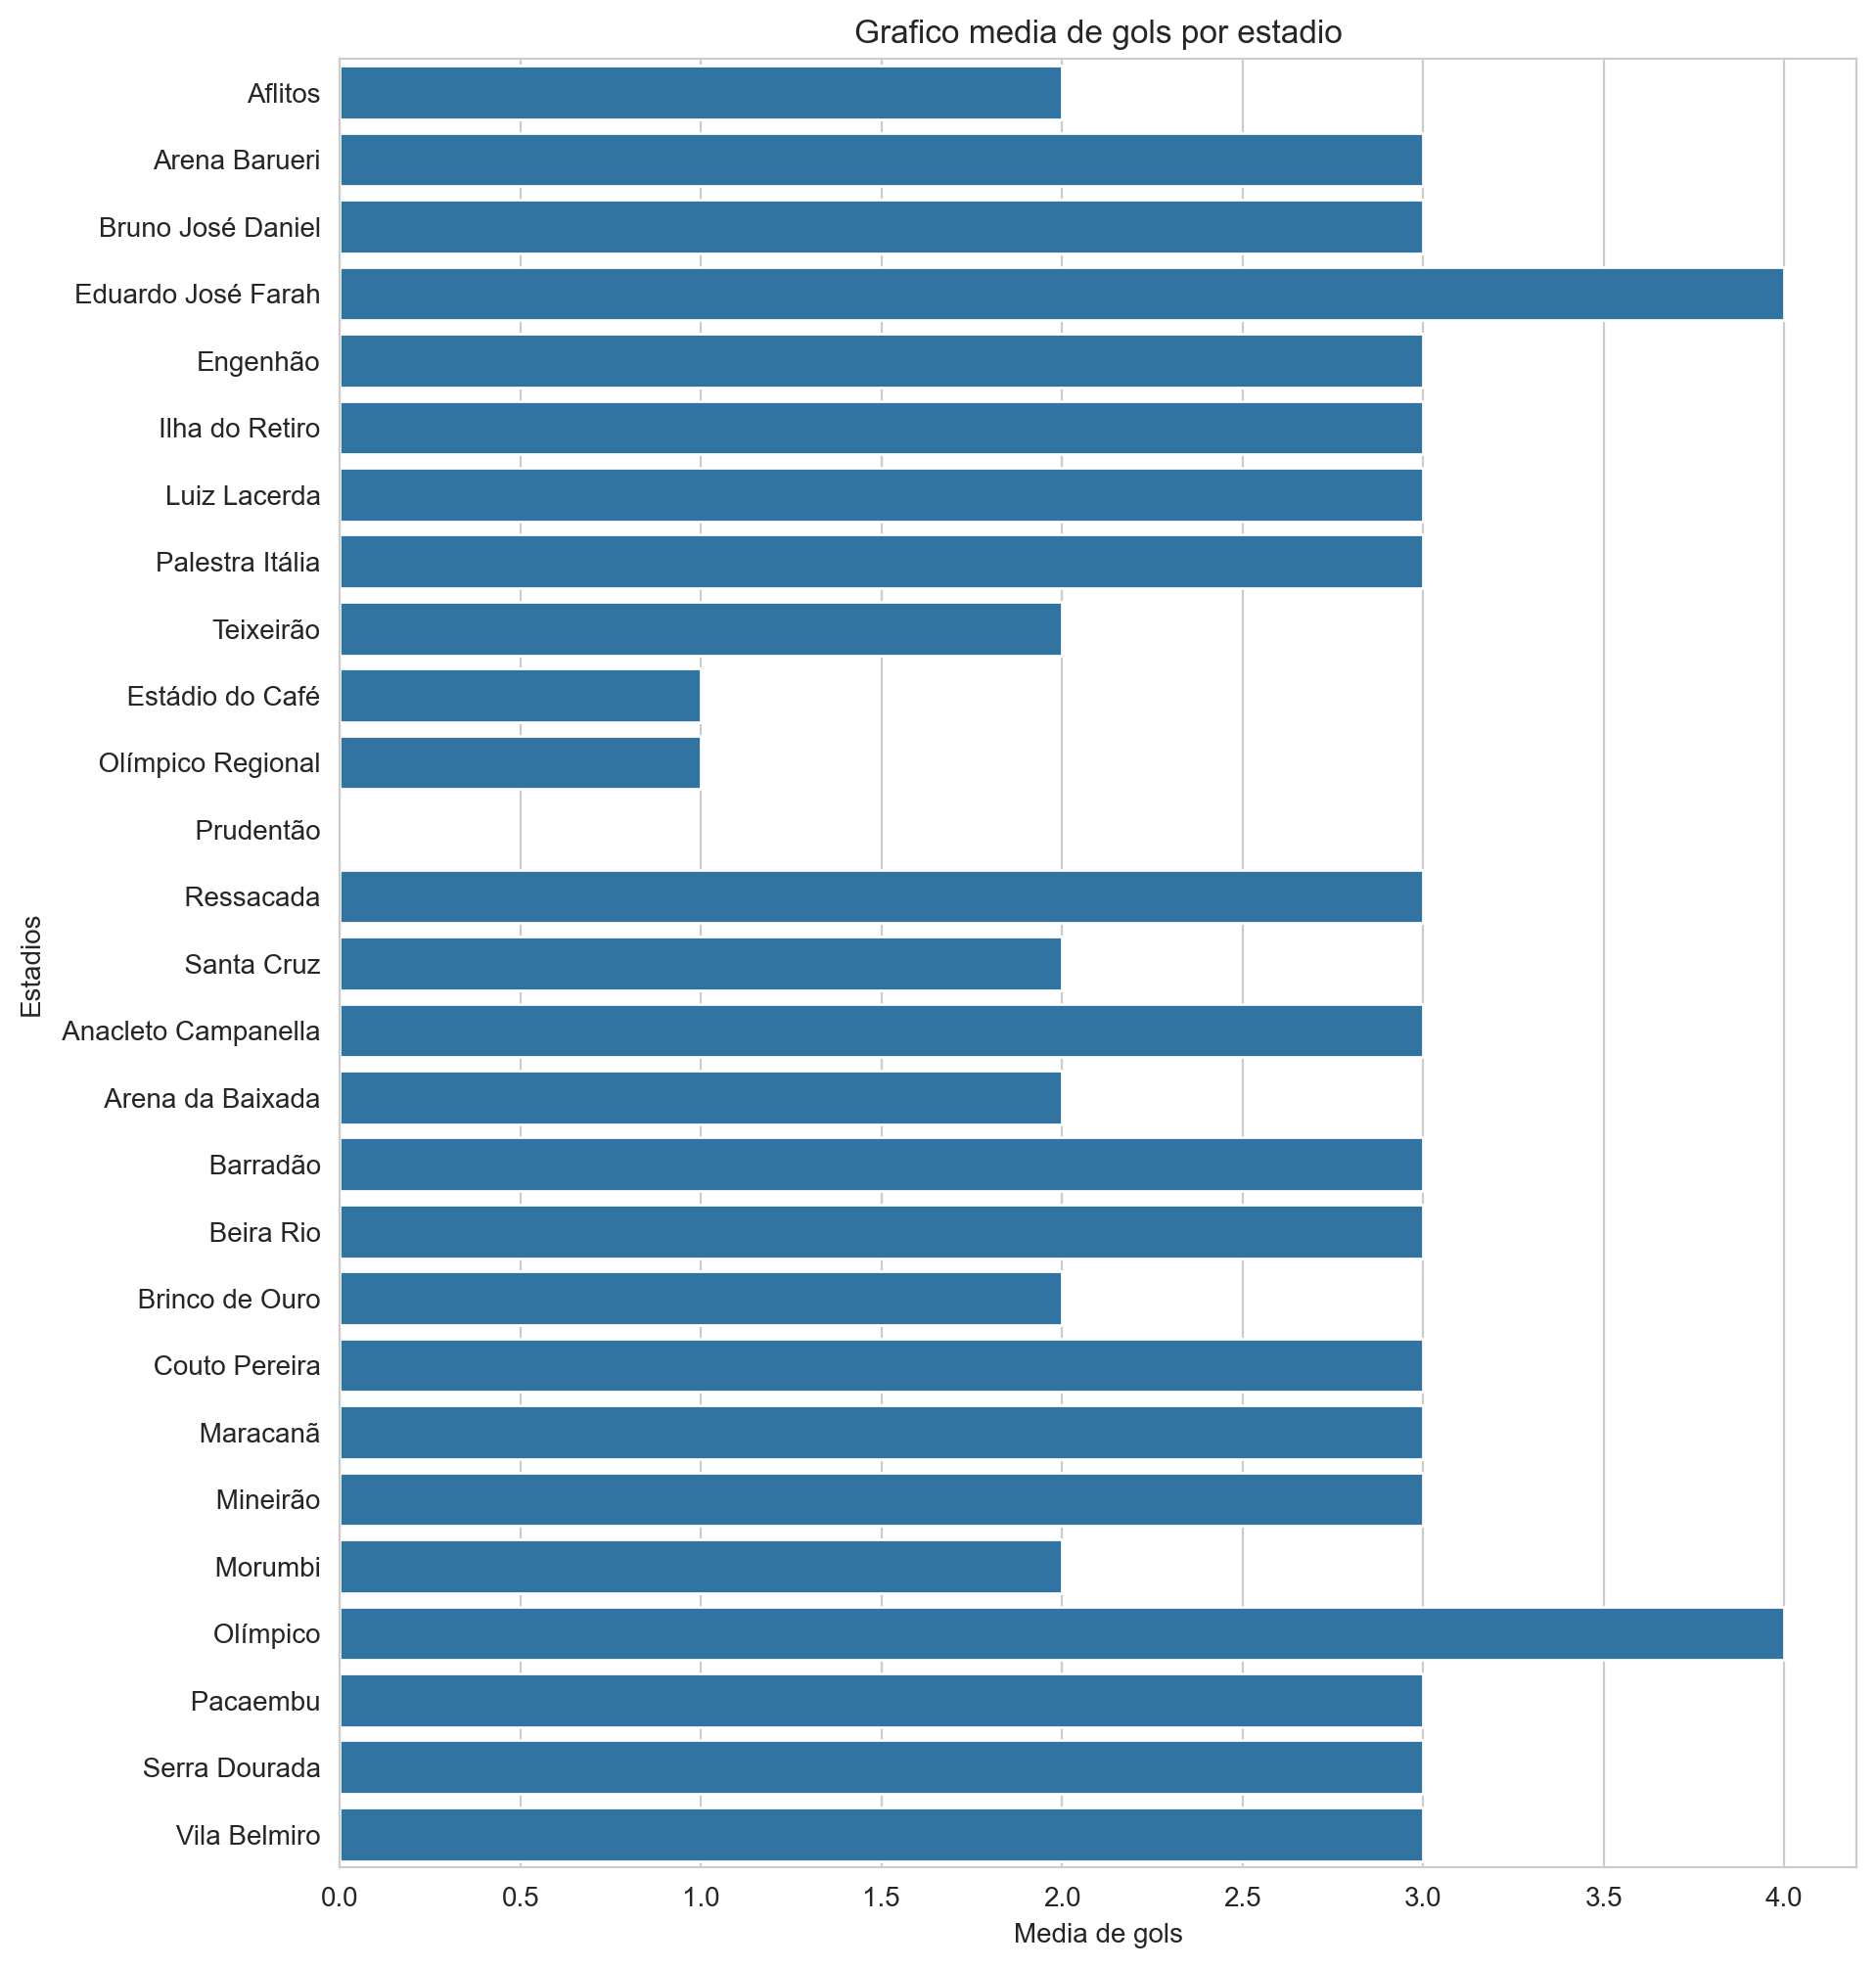

In [10]:
gols_por_estadio = df.groupby("arena")["total_gols"].mean().reset_index()
gols_por_estadio["total_gols"] = gols_por_estadio["total_gols"].round(0)
plt.figure(figsize=(10,12))
sns.barplot(data = gols_por_estadio, x="total_gols", y="arena")
plt.title("Grafico media de gols por estadio")
plt.xlabel("Media de gols")
plt.ylabel("Estadios")

#Media de gols por estadio, indica os estadios que tiveram os melhores jogos.

Text(0, 0.5, 'Clubes')

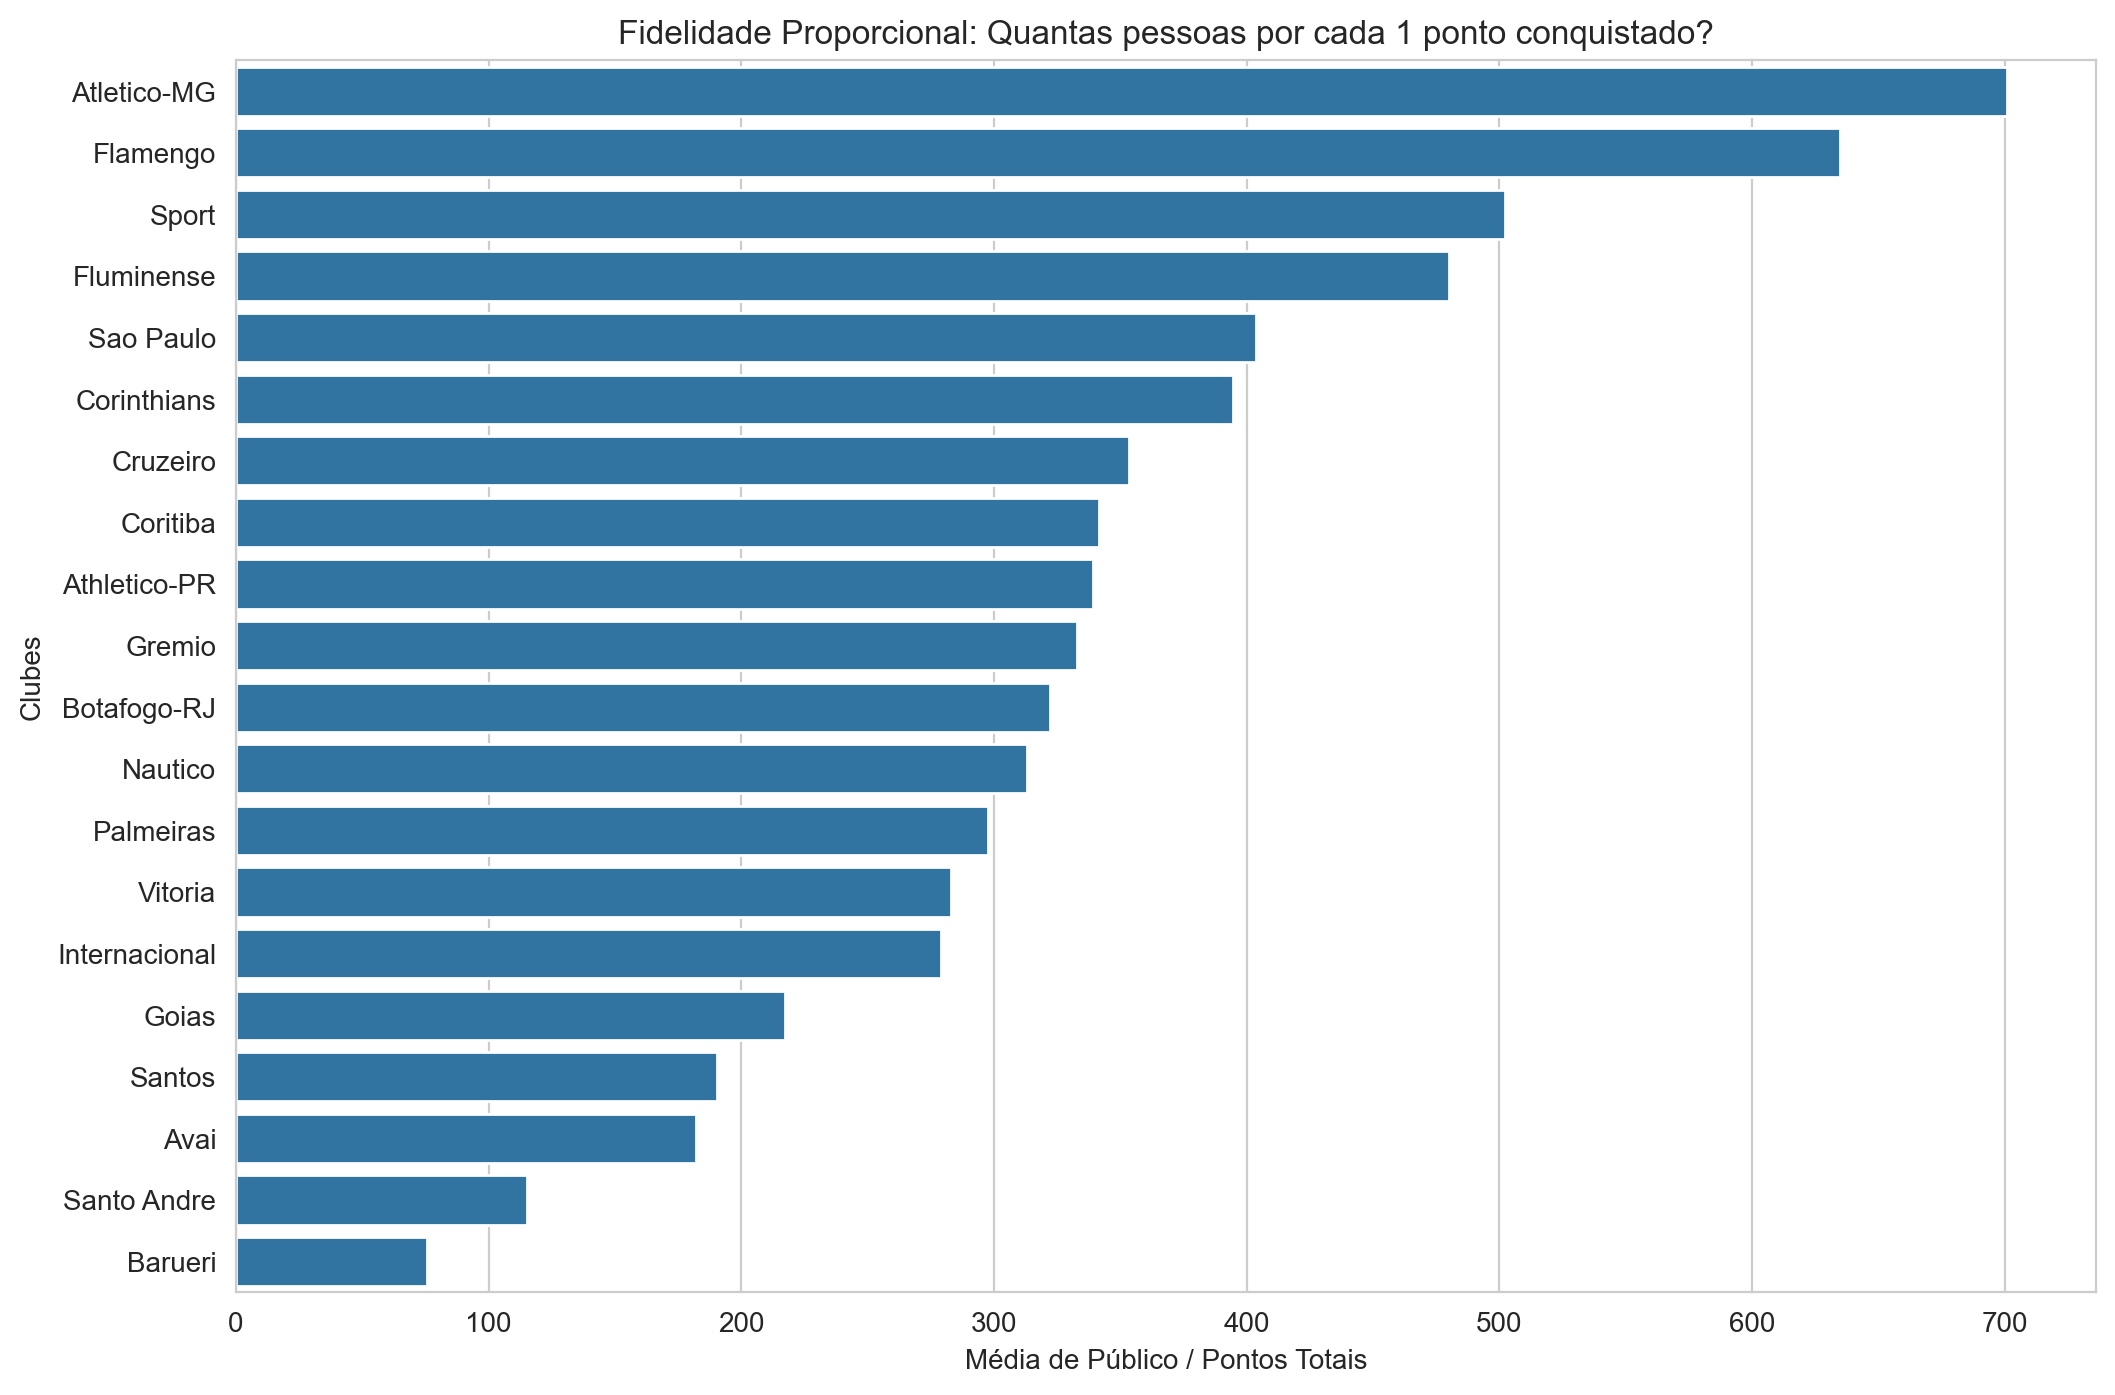

In [11]:
tabela_com_publico["publico_por_ponto"] = tabela_com_publico["publico_jogo"] / tabela_com_publico["PTS_Total"]
tabela_com_publico = tabela_com_publico.sort_values('publico_por_ponto', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(data = tabela_com_publico, x="publico_por_ponto", y="Time")
plt.title("Fidelidade Proporcional: Quantas pessoas por cada 1 ponto conquistado?")
plt.xlabel("Média de Público / Pontos Totais")
plt.ylabel("Clubes")

#Times que tem muito  torcida por ponto conquistado significa que fizeram jus aos torcedores que foram aos estadios.

Text(0, 0.5, 'Árbitro')

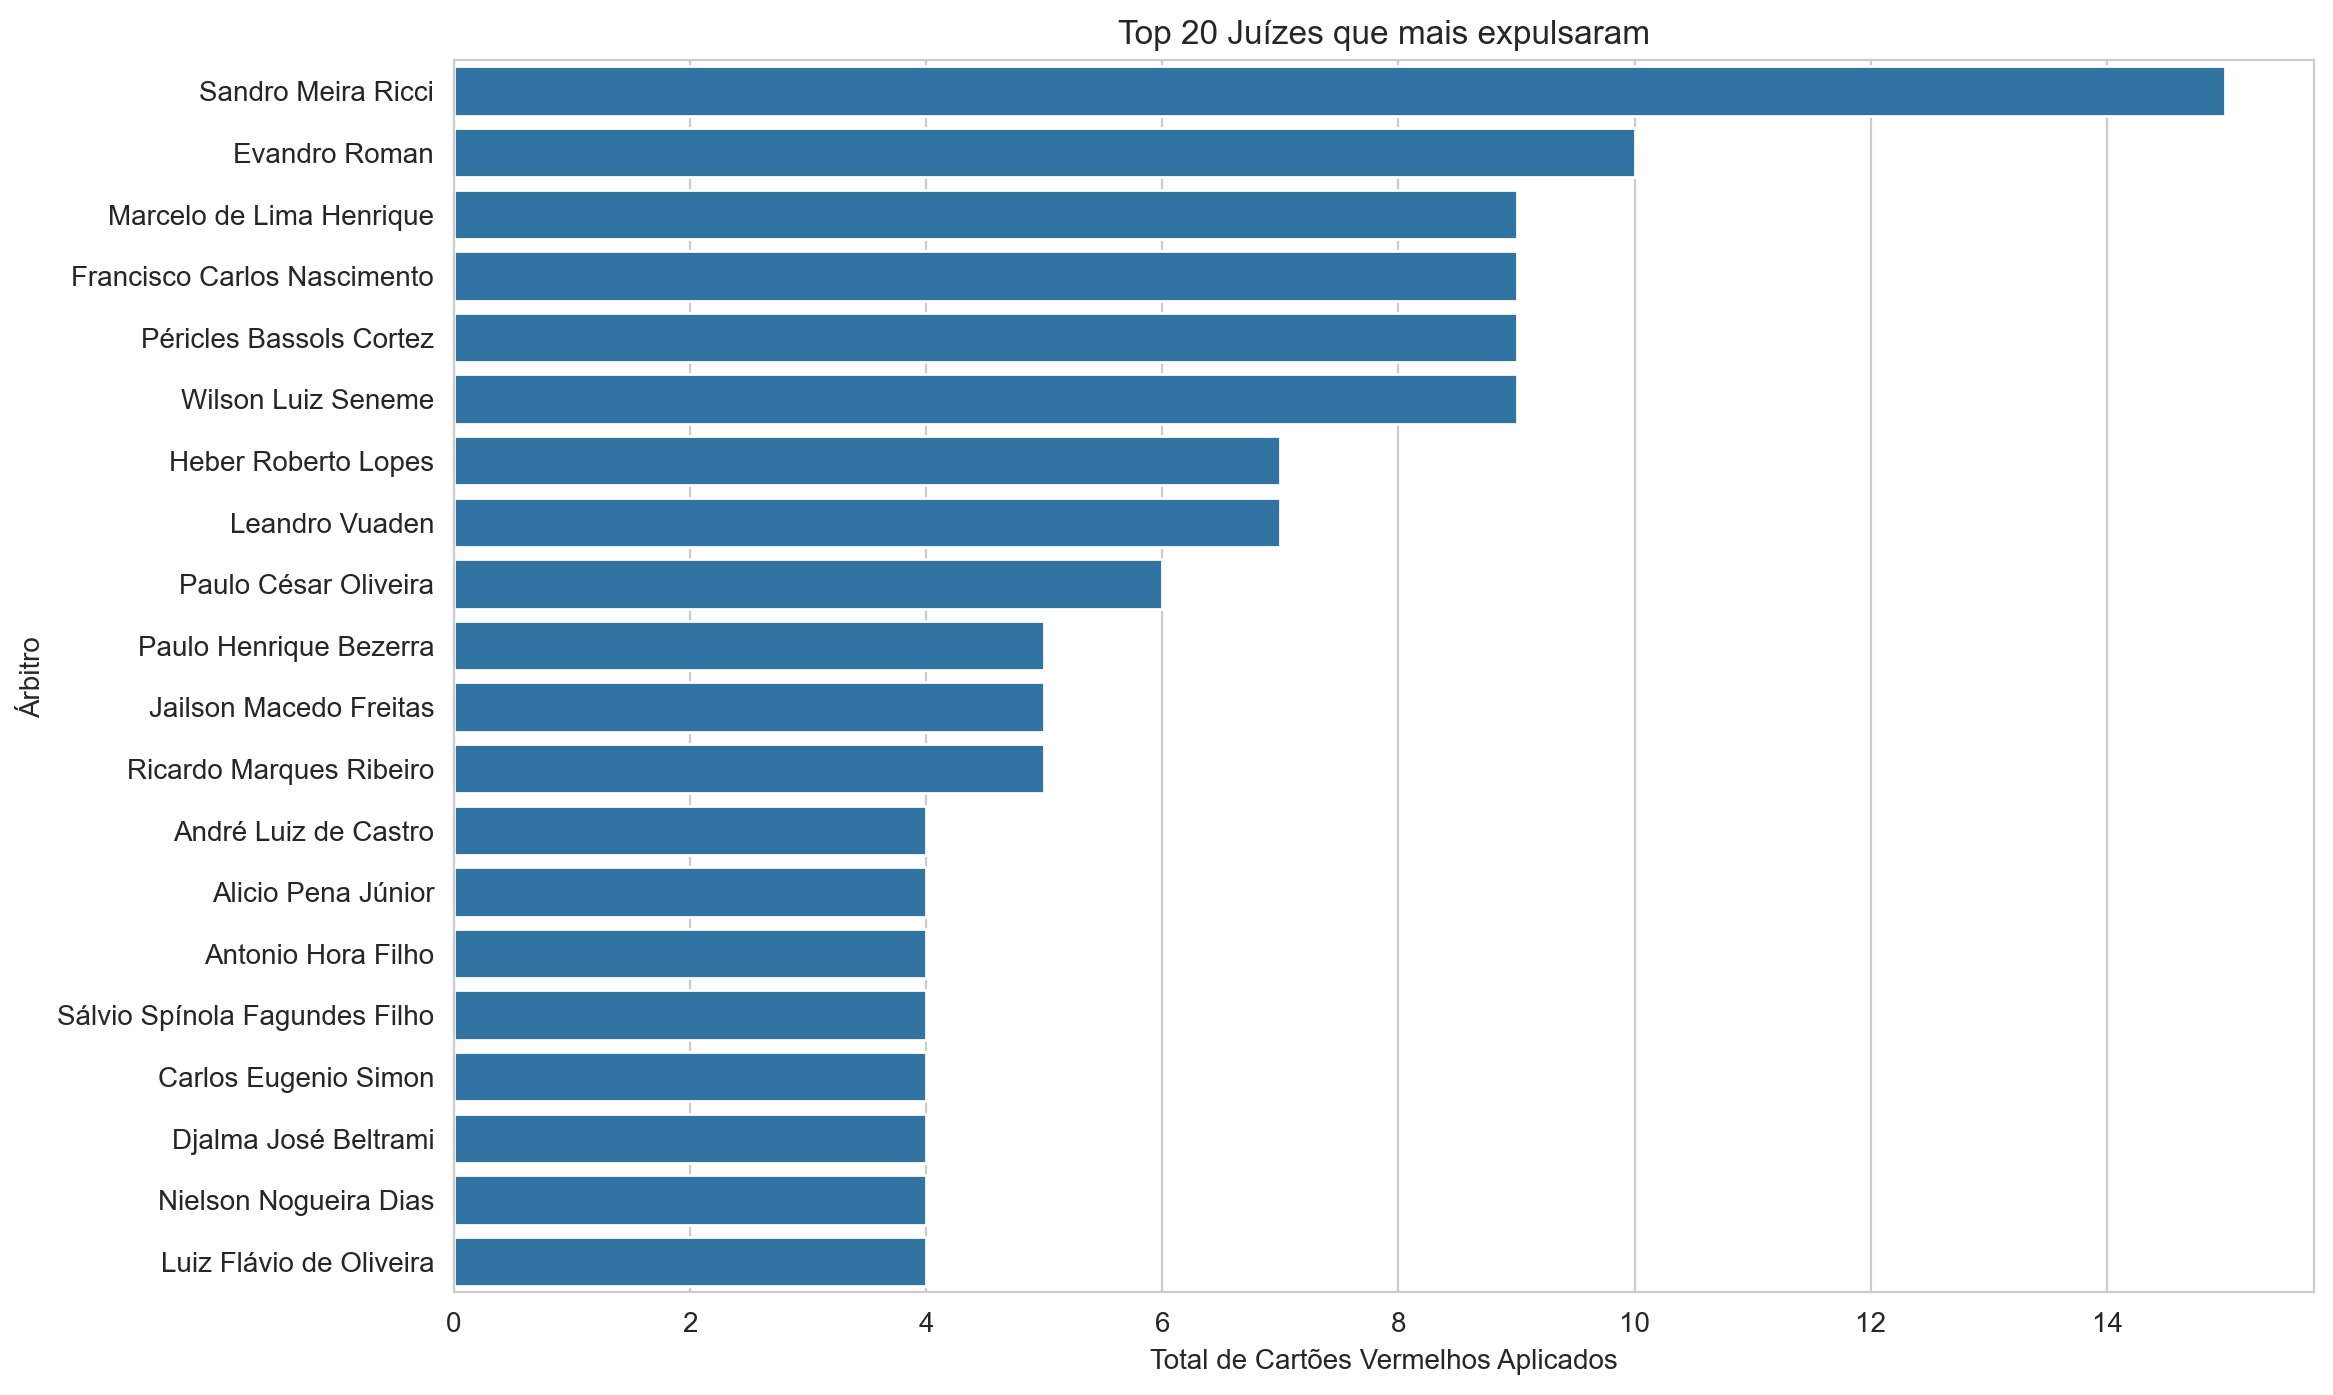

In [ ]:
df["total_expulsos_jogo"] = df["expulsao_mandate"] + df["expulsao_visitante"]
ranking_juizes = df.groupby("juiz_partida")["total_expulsos_jogo"].sum().reset_index()
ranking_juizes = ranking_juizes.sort_values(by="total_expulsos_jogo", ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(data=ranking_juizes.head(20), x="total_expulsos_jogo", y="juiz_partida")
plt.title("Top 20 Juízes que mais expulsaram")
plt.xlabel("Total de Cartões Vermelhos Aplicados")
plt.ylabel("Árbitro")
#Tiramos muitas coisas desse grafico, sandro meira ricci foi o que mais expulsou entao pode ter sido o que mais apitou partidas, e depois todos os juizes se mantem numa media parecida mostrando que provavelmente o treinamento da CBF ajuda para essa media

In [18]:
tabela_com_publico.to_csv('brasileirao_2009_final_times.csv', index=False)
ranking_juizes.to_csv("ranking_arbitragem_2009.csv", index=False)